In [ ]:
# - DataSet
#  https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia 


# dense layers - last threee layers inneurual netwtork called dense layers.

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\asus\Python Data Science\Vision Transformers - Pytorch\visionTransformers\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\asus\Python Data Science\Vision Transformers - Pytorch\visionTransformers\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
from tensorflow import keras

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten

In [3]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
!tree "./dataset" -d

Too many parameters - -d


In [6]:
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
# disreguard the final fully connected layer, which does the classification. We do this, in situations, if we need to customize
# the final outputs. Usually, VGG 16 has close to 1000 output classes. But here for pneumonia prediction we need only two classes
# as positive and negative.

# we use this strategy for situations, where we need the embeddings generated from the model to be plugged with another
# customized requirements.

In [7]:
# prevent weights adjustments of the VGG modle during the training procedure. So it will have the pretrained imagenet weights.
for layer in vgg.layers:
    layer.trainable = False

In [8]:
folders = glob('./dataset/train/*')
x = Flatten()(vgg.output) # flatten the embeddings generated to one single tensor, overl the 1000s of tensors output

In [10]:
len(folders)

2

In [17]:
# use the derived flattened tensor and re-use it to create a custom and trainable dense layer for us to get the binary class
# output we need as penumonia positive / negative. Hence it`s binary classed, we can use softmax either.
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
# configure the back prop pipiline
# this is a part of tensorflow
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
# used for the image augmentation process.
from keras.preprocessing.image import ImageDataGenerator

In [21]:
# augmentation pipeline
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
# batch size means, size of images you take from the dataset for one backprop training.
# one epoc has multiple batches. Untill the dataset size is reached , batches are taken inside the given epoc.
# once the entire datset is taken inside, first epoc will be completed. Then repeat the same process for the other epocs as well
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [22]:
# training procedure
historyr = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Thurunu Mihiranga\AppData\Local\Temp\ipykernel_3828\1971581542.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


522/522 [==============================] - 366s 700ms/step - loss: 0.1911 - accuracy: 0.9327 - val_loss: 0.3201 - val_accuracy: 0.9135


In [23]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray.h5') # save the trained modle

In [13]:
from keras.models import load_model

In [14]:
from keras.preprocessing import image

In [15]:
from keras.applications.vgg16 import preprocess_input # import the model`s skeleton

In [16]:
import numpy as np

In [17]:
model=load_model('chest_xray.h5')

In [26]:
#load the test image
#tf.keras.utils.load_img
img=tf.keras.utils.load_img("dataset\\test\\PNEUMONIA\\person1_virus_6.jpeg",target_size=(224,224))

x=tf.keras.preprocessing.image.img_to_array(img) # image as a numpy array

x=np.expand_dims(x, axis=0)

img_data=preprocess_input(x) # organize for the prediction

In [31]:
classes=model.predict(img_data)

1/1 [==============================] - 0s 84ms/step


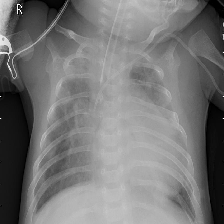

In [28]:
img

In [30]:
result=int(classes[0][0])

In [29]:
if result== 0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

NameError: name 'result' is not defined